**Run the following two cells before you begin.**

In [2]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,default payment next month,EDUCATION_CAT,graduate school,high school,others,university,graduate school.1,high school.1,others.1,university.1
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,1,university,0,0,0,1,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1,university,0,0,0,1,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,0,university,0,0,0,1,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,0,university,0,0,0,1,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,0,university,0,0,0,1,0,0,0,1


Text(0.5, 1.0, 'Sigmoid Function')

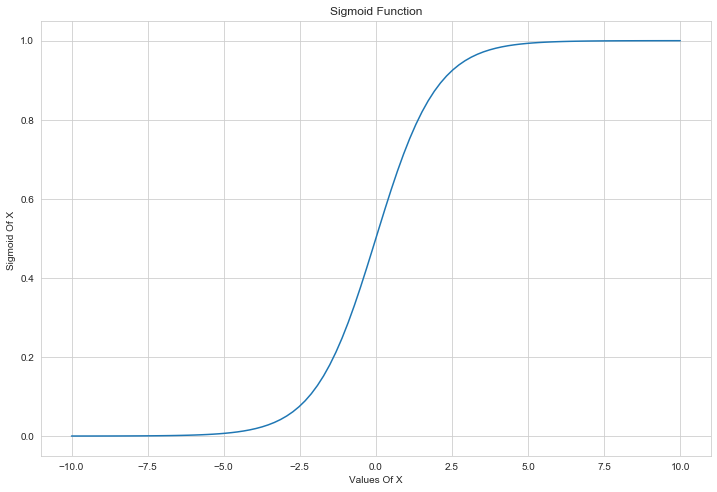

In [5]:
# Define the sigmoid function
# Define the sigmoid function
def sigmoid_func(X):
    Y=1/(1/1+np.exp(-X))
    return Y

import matplotlib.pyplot as plt
import seaborn as sns
X=np.linspace(-10,10,100)
X
Z=1/(1+np.exp(-X))
Z
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(X,Z)
plt.xlabel('Values Of X')
plt.ylabel('Sigmoid Of X ')
plt.title('Sigmoid Function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [6]:
# Create a train/test split
from sklearn.model_selection import train_test_split

In [7]:
X=df[['PAY_1','LIMIT_BAL']]
y=df['default payment next month']
X,y

(       PAY_1  LIMIT_BAL
 0          2      20000
 1         -1     120000
 2          0      90000
 3          0      50000
 4         -1      50000
 ...      ...        ...
 26659      0     220000
 26660     -1     150000
 26661      4      30000
 26662      1      80000
 26663      0      50000
 
 [26664 rows x 2 columns],
 0        1
 1        1
 2        0
 3        0
 4        0
         ..
 26659    0
 26660    0
 26661    1
 26662    1
 26663    1
 Name: default payment next month, Length: 26664, dtype: int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_model=LogisticRegression(solver='liblinear')


______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [11]:
# Fit the logistic regression model on training data
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Make predictions using `.predict()`
pred=log_model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
# Find class probabilities using `.predict_proba()`
pred_proba=log_model.predict_proba(X_test)
pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [14]:
# Add column of 1s to features
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [15]:
# Get coefficients and intercepts from trained model
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [16]:
# Manually calculate predicted probabilities
ones_feat=np.hstack([np.ones((X_test.shape[0],1)),X_test])
ones_feat

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [18]:
print('Coefficients Of Our Logistic Model',log_model.coef_)
print('\n')
print('Intercept of Our Logistic Model',log_model.intercept_)
log_model_coeff=log_model.coef_
log_model_intercept=log_model.intercept_

Coefficients Of Our Logistic Model [[ 8.27451187e-11 -6.80876727e-06]]


Intercept of Our Logistic Model [-6.57647457e-11]


In [20]:
coeff_interc_feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
coeff_interc_feats

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [21]:
man_pred_proba=np.dot(coeff_interc_feats,np.transpose(ones_feat))
man_pred_proba

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

In [22]:
def sigmoid_func(X):
    Y=1/(1/1+np.exp(-X))
    return Y

In [24]:
sigmoid_func(man_pred_proba)

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

In [25]:
sig_man_predproba=sigmoid_func(man_pred_proba)

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [26]:
# Manually calculate predicted classes
pred_manual=sig_man_predproba>=0.5
pred_manual.shape

(1, 5333)

In [27]:
# Compare to scikit-learn's predicted classes
pred.shape

(5333,)

In [28]:
np.array_equal(pred_manual,pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [30]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_proba[:,1])


0.627207450280691

In [33]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,man_pred_proba.reshape(man_pred_proba.shape[1],))


0.627207450280691